In [1]:
import pandas as pb;
import matplotlib as mp;
import matplotlib.pyplot as plt;
import seaborn as sb;

In [2]:
#EDA FOR CUSTOMERS.csv
df1=pb.read_csv('Customers.csv')
print(df1)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


In [3]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [5]:
df1.isna().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
df1.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [7]:
Unique_regions=df1['Region'].unique()
print(Unique_regions)

['South America' 'Asia' 'North America' 'Europe']


In [8]:
print(df1['SignupDate'].min(),df1['SignupDate'].max())

2022-01-22 2024-12-28


Text(0.5, 0, 'YEARS')

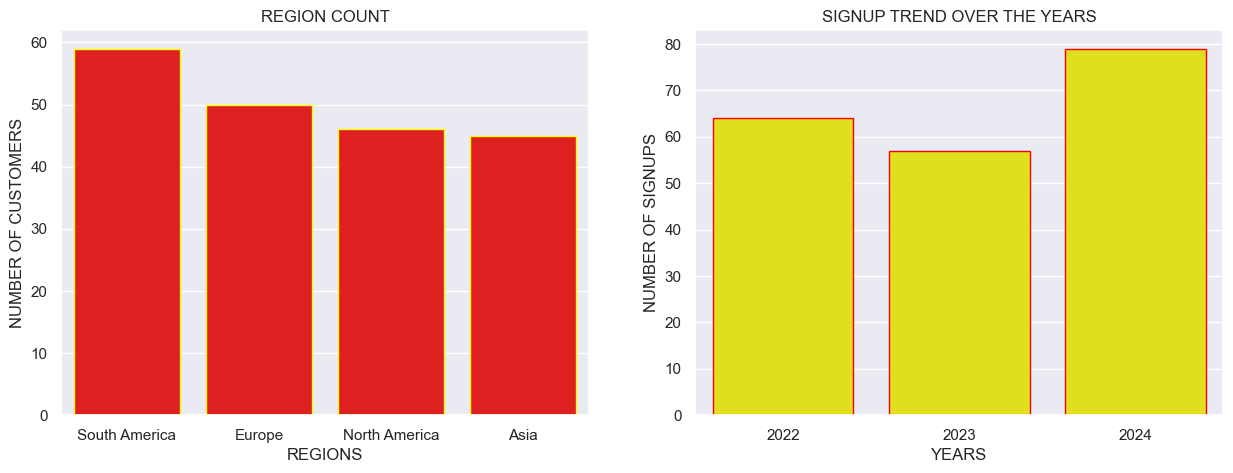

In [9]:
#CUSTOMER COUNT PER REGION

sb.set(style='darkgrid')
Region_count=df1['Region'].value_counts()
fig1,ax1 = plt.subplots(1,2,figsize=(15,5))
sb.barplot(Region_count,color='red', edgecolor='yellow',ax=ax1[0])
ax1[0].set_title('REGION COUNT')
ax1[0].set_ylabel('NUMBER OF CUSTOMERS')
ax1[0].set_xlabel('REGIONS')

#CUSTOMERS OVER TIME

df1['SignupDate'] = pb.to_datetime(df1['SignupDate'])
df1['SignupYear'] = df1['SignupDate'].dt.year 
SignupTrends=df1['SignupYear'].value_counts().sort_index()
sb.barplot(SignupTrends,color='yellow',edgecolor='red',ax=ax1[1])
ax1[1].set_title('SIGNUP TREND OVER THE YEARS')
ax1[1].set_ylabel('NUMBER OF SIGNUPS')
ax1[1].set_xlabel('YEARS')

In [10]:
#EDA FOR PROUCTS.CSV
df2=pb.read_csv('Products.csv')
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
print(df2.isna().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [12]:
print(df2.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [13]:
print(df2['Category'].unique())

['Books' 'Electronics' 'Home Decor' 'Clothing']


In [14]:
print(df2['Price'].describe())

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


Text(0, 0.5, 'NUMBER OF PRDUCTS')

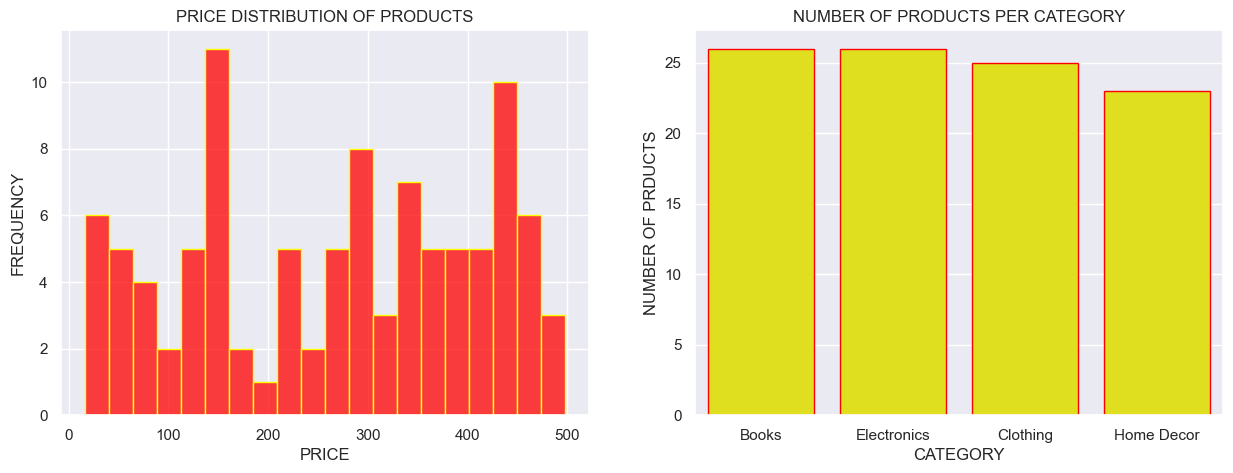

In [15]:
#PRICE DISTRIBUTION OF PRODUCTS

fig2,ax1 = plt.subplots(1,2,figsize=(15,5))
sb.histplot(data=df2['Price'],bins=20,color='red',edgecolor='yellow',ax=ax1[0])
ax1[0].set_title('PRICE DISTRIBUTION OF PRODUCTS')
ax1[0].set_xlabel('PRICE')
ax1[0].set_ylabel('FREQUENCY')

#PRODUCT CATEGORIES

Categories=df2['Category'].value_counts()
sb.barplot(Categories,color='yellow',edgecolor='red',ax=ax1[1])
ax1[1].set_title('NUMBER OF PRODUCTS PER CATEGORY')
ax1[1].set_xlabel('CATEGORY')
ax1[1].set_ylabel('NUMBER OF PRDUCTS')

In [16]:
#EDA FOR TRANSACTIONS.CSV
df3=pb.read_csv('Transactions.csv')

In [17]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [18]:
print(df3.isna().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [19]:
df3['TransactionDate']=pb.to_datetime(df3['TransactionDate'])

Text(811.8152173913045, 0.5, 'Day of the Week')

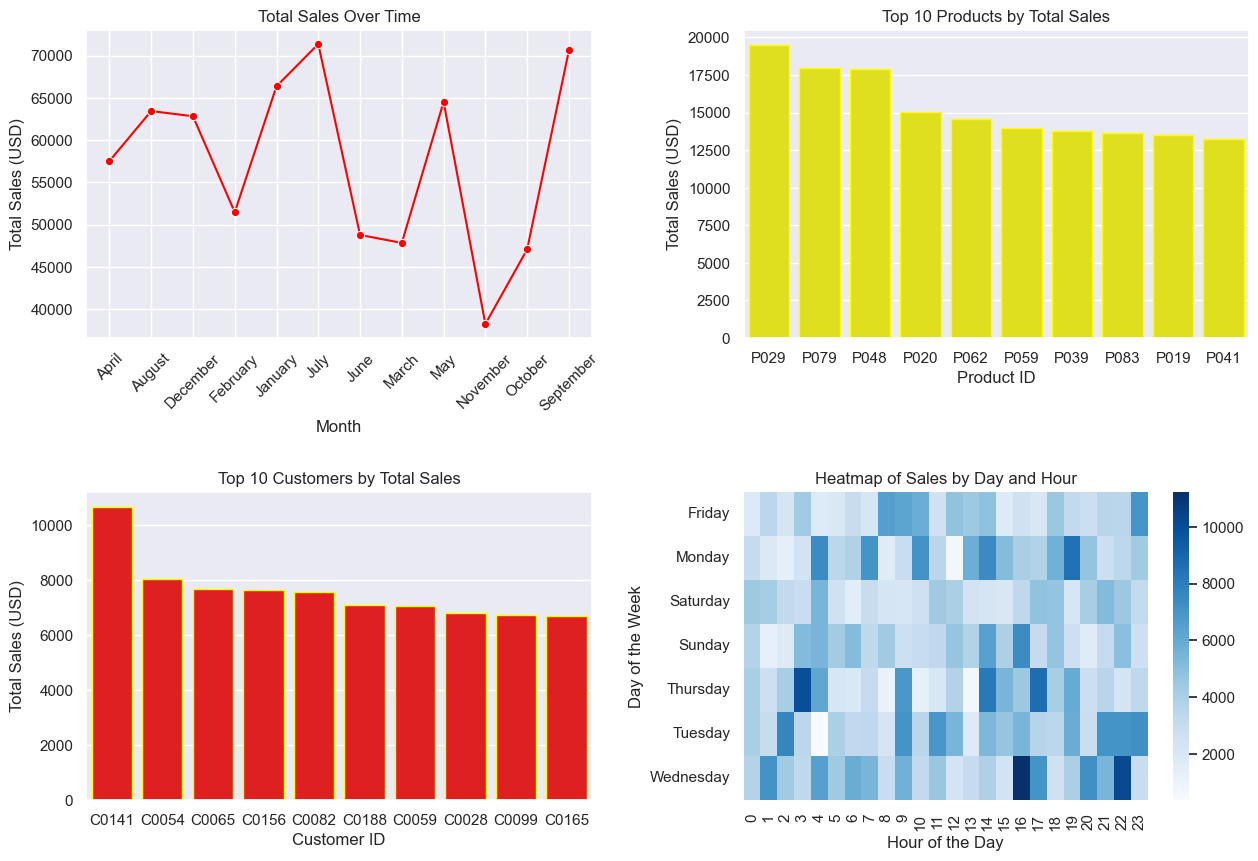

In [20]:
#SALE TRENDS OVER TIME

fig3,ax1=plt.subplots(2,2,figsize=(15,10),gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
df3['TransactionMonth']=df3['TransactionDate'].dt.month_name().astype('category')
monthlysale=df3.groupby('TransactionMonth',observed=False)['TotalValue'].sum()
month_names = monthlysale.index.tolist()
sb.lineplot(data=monthlysale,marker='o',color='red',ax=ax1[0,0])
ax1[0,0].set_title('Total Sales Over Time')
ax1[0,0].set_xlabel('Month')
ax1[0,0].set_ylabel('Total Sales (USD)')
ax1[0,0].set_xticks(range(len(month_names)))
ax1[0,0].set_xticklabels(month_names,rotation=45)


#TOP PRODUCTS BY SALES

ProductSales=df3.groupby('ProductID',observed=False)['TotalValue'].sum().nlargest(10)
sb.barplot(ProductSales,color="yellow",edgecolor='yellow',ax=ax1[0,1])
ax1[0,1].set_title('Top 10 Products by Total Sales')
ax1[0,1].set_xlabel('Product ID')
ax1[0,1].set_ylabel('Total Sales (USD)')


#TOP 10 CUSTOMERS

CustomerSales = df3.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
sb.barplot(CustomerSales.head(10),color='red',edgecolor='yellow',ax=ax1[1,0])
ax1[1,0].set_title('Top 10 Customers by Total Sales')
ax1[1,0].set_xlabel('Customer ID')
ax1[1,0].set_ylabel('Total Sales (USD)')


#SALES BY DAY AND HOUR

df3['Day'] = df3['TransactionDate'].dt.day_name()
df3['Hour'] = df3['TransactionDate'].dt.hour
salesHeatmap = df3.pivot_table(index='Day', columns='Hour', values='TotalValue', aggfunc='sum')
sb.heatmap(salesHeatmap,cmap='Blues',ax=ax1[1,1])
ax1[1,1].set_title('Heatmap of Sales by Day and Hour')
ax1[1,1].set_xlabel('Hour of the Day')
ax1[1,1].set_ylabel('Day of the Week')